## Problem 1

In [1]:
import numpy as np
import ephem as ephem
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in data
T = np.genfromtxt('allsky_sample.csv', names=True, delimiter=',')

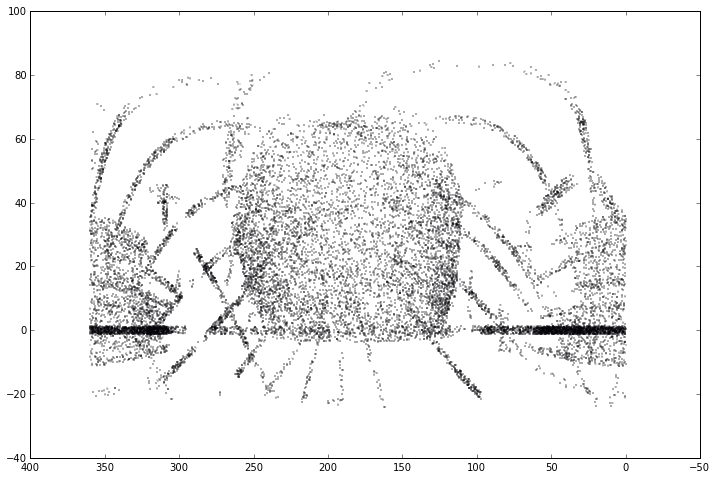

In [3]:
# ra vs dec scatter plot
fig, ax = subplots(figsize=(12,8))
ax.scatter(T['ra'], T['dec'], marker='.', s=0.1)
ax.invert_xaxis()

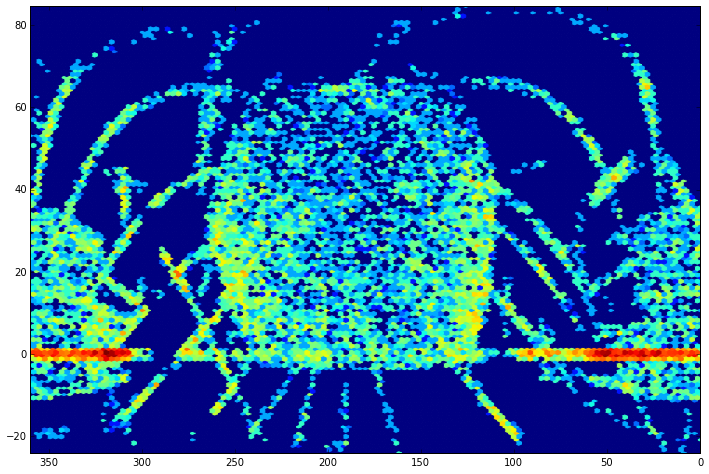

In [4]:
# ra vs dec hex plot
fig, ax = subplots(figsize=(12,8))
plt.hexbin(T['ra'], T['dec'],bins='log', gridsize=120, cmap=plt.cm.jet)
ax.invert_xaxis()

## Problem 2

In [5]:
def equgal(ra,dec):
    # convert equatorial to Galactic coordinates
    r = np.radians(ra)
    d = np.radians(dec)
    c1 = np.radians(62.6)
    c2 = np.radians(282.25)
    b = arcsin((np.sin(d) * np.cos(c1)) - (np.cos(d) * np.sin(r-c2) * np.sin(c1)))
    l = arccos((np.cos(d)*np.cos(r-c2))/np.cos(b)) + np.radians(33)
    
    return np.degrees(l),np.degrees(b)

In [6]:
# make l, b array
l,b = equgal(T['ra'],T['dec'])

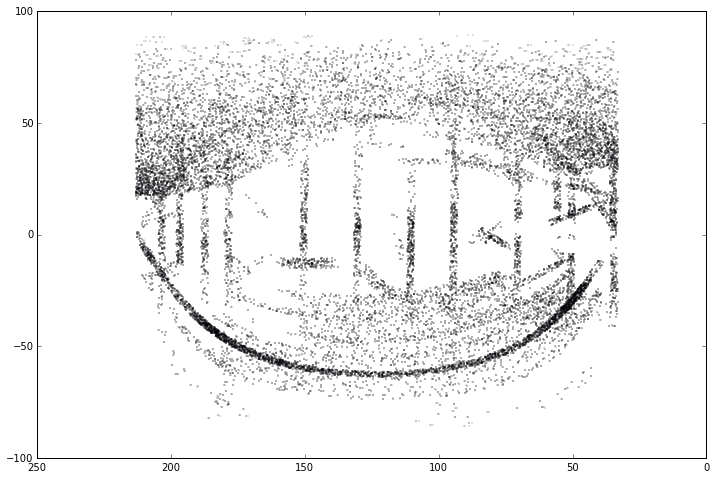

In [7]:
# l vs b scatter plot
fig, ax = subplots(figsize=(12,8))
ax.scatter(l,b, marker='.', s=0.1)
ax.invert_xaxis()

In [8]:
g_plane = np.argsort(np.sqrt(l**2+b**2))
print T['ra'][g_plane][0:5],T['dec'][g_plane][0:5]


[ 281.17915668  281.17914071  281.18113808  281.47628791  280.29633014] [-0.12461287 -0.12461688 -0.12577648 -0.32265     0.32005961]


In [9]:
print l[g_plane][0:5]
print b[g_plane][0:5]

[ 33.60348966  33.60350057  33.60361067  33.64253963  33.61508136]
[ 0.89334301  0.89335534  0.89104838  0.53840698  1.88176389]


## Problem 3

In [10]:
def gc_dist(lon1,lat1,lon2,lat2):
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)
    dlon = lon2-lon1
    dist = np.arctan2(sqrt((np.cos(lat2)*np.sin(dlon))**2 + (np.cos(lat1)*np.sin(lat2)-
                    np.sin(lat1)*np.cos(lat2)*np.cos(dlon))**2),
                    (np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(dlon) ))
    return np.degrees(dist)

In [11]:
D = np.genfromtxt('small_sdss.csv', names=True, delimiter=',')

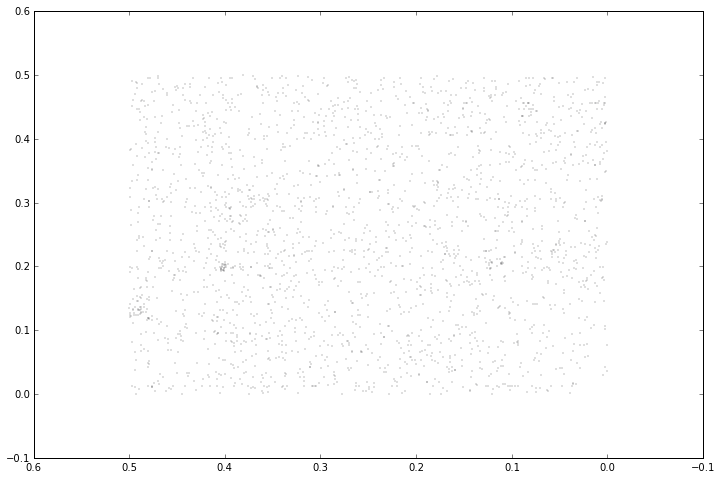

In [12]:
fig, ax = subplots(figsize=(12,8))
ax.scatter(D['ra'], D['dec'], marker='.', s=0.1)
ax.invert_xaxis()

In [13]:
X = np.triu_indices(size(D),1)
L,B = equgal(D['ra'],D['dec'])
dist = gc_dist(L[X[0][:]],B[X[0][:]],L[X[1][:]],B[X[1][:]])

In [14]:
size(X), size(L), size(B), size(dist)

(5380080, 2320, 2320, 2690040)

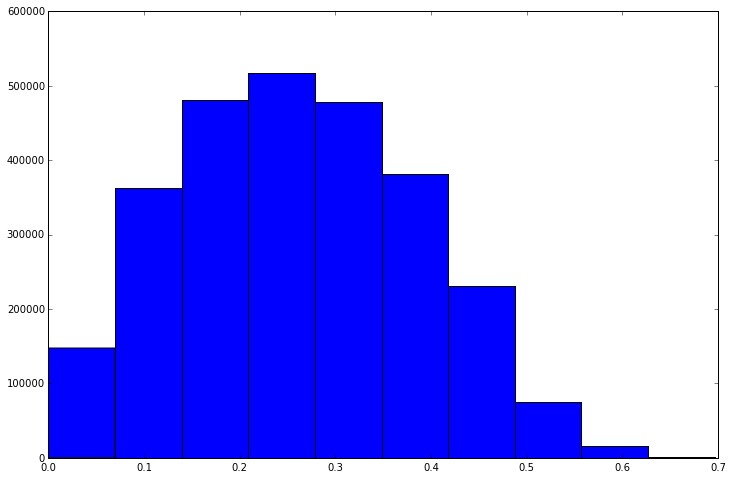

In [15]:
# plot histogram for all distance pairs
fig, ax = subplots(figsize=(12,8))
ax.hist(dist);

In [20]:
## The distribution will always be Gaussian as shown below.
Z = np.random.rand(2,7500)


tr = np.triu_indices(7500,1)
L2,B2 = equgal(Z[0,:],Z[1,:])
dist2 = gc_dist(L2[tr[0][:]],B2[tr[0][:]],L2[tr[1][:]],B2[tr[1][:]])


In [21]:
size(Z),size(tr), size(L2), size(B2), size(dist)

(15000, 56242500, 7500, 7500, 2690040)

In [22]:
size(dist2)

28121250

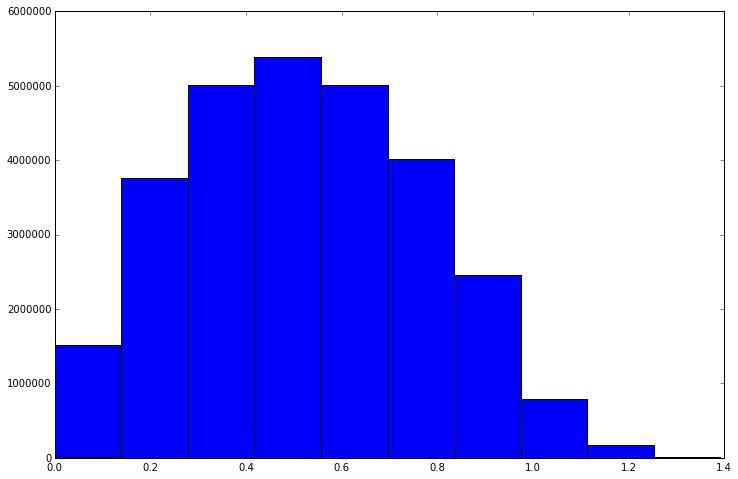

In [23]:
# plot histogram for all distance pairs
fig, ax = subplots(figsize=(12,8))
ax.hist(dist2);